In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('cars24-car-price-clean.csv')

In [ ]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  float64
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   make              19820 non-null  float64
 8   model             19820 non-null  float64
 9   Individual        19820 non-null  float64
 10  Trustmark Dealer  19820 non-null  float64
 11  Diesel            19820 non-null  float64
 12  Electric          19820 non-null  float64
 13  LPG               19820 non-null  float64
 14  Petrol            19820 non-null  float64
 15  Manual            19820 non-null  float64
 16  5                 19820 non-null  float6

In [ ]:
X=df['model'].values
Y=df['selling_price'].values

In [ ]:
'''sigma=4.847
mu=6.585
Y=(sigma*Y)+mu
rnd=np.vectorize(round)
Y=rnd(Y,2)'''
Y

array([-1.11104589, -0.22394353, -0.91505816, ..., -0.48182212,
        1.16860087,  1.11702515])

In [ ]:
X

array([-1.12568266, -0.3332271 , -0.78980745, ..., -0.4486842 ,
        0.32802721,  1.03651397])

In [ ]:
def hypothesis(x,W):
  y_hat=W[0]+W[1]*x
  return y_hat

In [ ]:
def error(X,Y,W):
  n=X.shape[0]
  total_error=0
  for i in range(n):
    y=Y[i]
    y_hat=hypothesis(X[i],W)
    total_error+=(y-y_hat)**2
  return total_error/n

In [ ]:
# important we cant use (y-y_hat),we have to use(y_hat-y)
def der_F(X,Y,W):
  grad=np.zeros(2)
  n=X.shape[0]
  for i in range(n):
    y=Y[i]
    x=X[i]
    y_hat=hypothesis(x,W)
    grad[0]+=(y_hat-y)
    grad[1]+=(y_hat-y)*x
  return grad/n

In [ ]:
def GradientDescent(X,Y,W,learning_rate,max_steps):
  w_list=[]
  error_list=[]
  for i in range(max_steps):
    grad=der_F(X,Y,W)
    e=error(X,Y,W)
    print(e)
    W[0]=W[0]-learning_rate*grad[0]
    W[1]=W[1]-learning_rate*grad[1]
    error_list.append(e)
    #print(W[0],W[1])
    w_list.append((W[0],W[1]))
  return W,error_list,w_list

In [ ]:
np.zeros(2)

array([0., 0.])

In [ ]:
W=np.zeros(2)
W,error_list,w_list=GradientDescent(X,Y,W,0.01,500)

1.0000000000000115
0.9814666591071399
0.9633021316980643
0.945499078384413
0.9280503058316979
0.9109487638527849
0.8941875425592518
0.8777598695694654
0.861659107272176
0.8458787501446026
0.8304124221238839
0.8152538740307703
0.8003969810446683
0.7858357402290397
0.7715642681056328
0.7575767982774597
0.7438676790988771
0.7304313713919625
0.7172624462083931
0.7043555826359991
0.6917055656487014
0.6793072839994243
0.6671557281549676
0.6552459882718186
0.6435732522123664
0.6321328036004851
0.6209200199159687
0.6099303706267848
0.5991594153584604
0.588602802099964
0.5782562654453298
0.5681156248701099
0.5581767830423292
0.5484357241669305
0.5388885123631381
0.5295312900742719
0.520360276508937
0.5113717661135504
0.5025621270750288
0.4939277998533874
0.48546529574344166
0.4771711954652885
0.46904214778267517
0.46107486814893395
0.4532661373799069
0.4456128003532083
0.438111764733324
0.4307599997222657
0.4235545348349338
0.416492458698849
0.40957091787789934
0.40278711571927217
0.39613831122

In [ ]:
W

array([-1.37351337e-16,  9.58710267e-01])

<Axes: xlabel='iteraton', ylabel='error'>

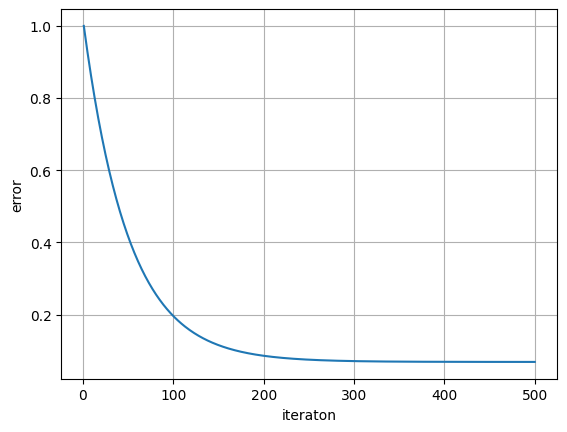

In [ ]:
plt.grid()
plt.xlabel('iteraton')
plt.ylabel('error')
sns.lineplot(x=np.arange(1,501),y=error_list)

<Axes: >

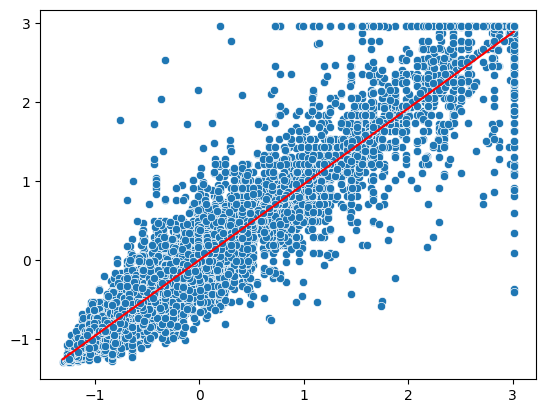

In [ ]:
Y_hat=hypothesis(X,W)
sns.scatterplot(x=X,y=Y)
sns.lineplot(x=X,y=Y_hat,color='r')

#Verifying with sklearn package

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)

In [ ]:
model.fit(X,Y)

LinearRegression()

In [ ]:
model.predict(X)

array([[-1.08634131],
       [-0.32158118],
       [-0.76220457],
       ...,
       [-0.43300319],
       [ 0.31656303],
       [ 1.00028896]])

In [ ]:
Y

array([[-1.11104589],
       [-0.22394353],
       [-0.91505816],
       ...,
       [-0.48182212],
       [ 1.16860087],
       [ 1.11702515]])

In [ ]:
model.intercept_

array([-1.18731936e-16])

In [ ]:
model.coef_

array([[0.96505112]])

In [ ]:
def estimate(w,b):
  models=df['model']
  yhat=ypred(w,b,models)
  sns.scatterplot(data=df,x='model',y='selling_price')
  sns.lineplot(x=models,y=yhat,color='r')

def ypred(w,b,x):
  return w*x+b

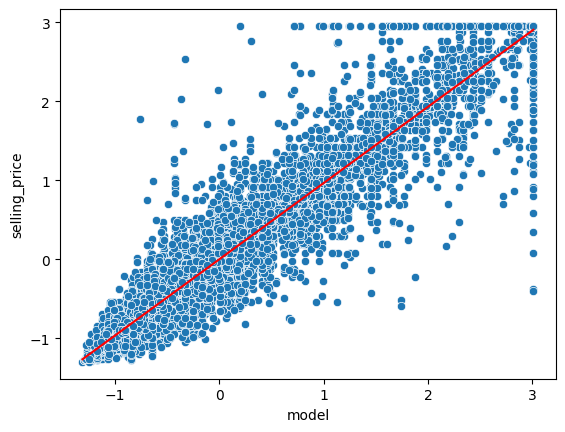

In [ ]:
estimate(0.965,-1.18731936e-16)

In [ ]:
model.score(X,Y)

0.9313236629576508

##Gradient Descent with Multiple Features

In [ ]:
X=df.drop('selling_price',axis=1)
ones=np.ones(X.shape[0])
X=df.drop('selling_price',axis=1)
X=pd.concat([X,pd.Series(ones)],axis=1)

In [ ]:
X=X.to_numpy()
Y=df['selling_price']
X

array([[-8.01316544e-01,  1.19582817e+00,  4.57451688e-02, ...,
         4.44503185e-01, -4.24728453e-01,  1.00000000e+00],
       [ 4.50030281e-01, -7.37872078e-01, -1.40401980e-01, ...,
         4.44503185e-01, -4.24728453e-01,  1.00000000e+00],
       [-1.42698996e+00,  3.56080197e-02, -5.82501459e-01, ...,
         4.44503185e-01, -4.24728453e-01,  1.00000000e+00],
       ...,
       [ 1.37193575e-01,  1.70967037e-01,  3.80810037e-01, ...,
         4.44503185e-01, -4.24728453e-01,  1.00000000e+00],
       [ 4.50030281e-01,  7.23559971e+01, -8.15185395e-01, ...,
        -2.24970266e+00,  2.35444551e+00,  1.00000000e+00],
       [ 1.38854040e+00, -8.73231095e-01, -3.49817523e-01, ...,
         4.44503185e-01, -4.24728453e-01,  1.00000000e+00]])

In [ ]:
def hypothesis(x,W):
  return np.sum(x*W) # x is a d dim point

In [ ]:
def error(X,W,Y):
  n=X.shape[0]
  total_error=0
  for i in range(n):
    y=Y[i]
    x=X[i] # x is a d dim point
    y_hat=hypothesis(x,W)
    total_error+=(y-y_hat)**2
  return total_error/n

In [ ]:
def der_F(X,Y,W):
  n=X.shape[0]
  m=X.shape[1]
  grad=np.zeros(X.shape[1])
  for j in range(m):
    # for all j features
    for i in range(n):
      y_hat=hypothesis(X[i],W)
      grad[j]+=X[i][j]*(y_hat-Y[i])
  return grad/n

In [ ]:
def GradientDescent(X,Y,W,learning_rate,max_steps):
  error_list=[]
  for i in range(max_steps):
    grad=der_F(X,Y,W)
    e=error(X,W,Y)
    print(e)
    W=W-learning_rate*grad
    error_list.append(e)
  return W,error_list

In [ ]:
m=X.shape[1]
W=np.zeros(m)
W,error_list=GradientDescent(X,Y,W,0.01,100)

1.0000000000000115
0.9293476185913133
0.8645865388869911
0.8052108912013557
0.7507589427618797
0.7008092108465457
0.654976920056513
0.6129107731610914
0.5742900076710632
0.5388217127731632
0.5062383835151898
0.47629569118655823
0.4487704507114998
0.4234587675780751
0.4001743483797015
0.3787469604618345
0.3590210274556025
0.34085434865524744
0.3241169312661804
0.3086899255256067
0.2944646535857458
0.28134172385884276
0.2692302232603849
0.258046980458451
0.24771589384906043
0.23816731853464013
0.22933750709080028
0.22116809936906365
0.2136056570049017
0.20660123868441968
0.20011001257296013
0.19409090262773984
0.18850626580710883
0.18332159745367463
0.17850526236973882
0.17402824932320904
0.16986394692232182
0.1659879389800761
0.16237781765536405
0.15901301280940633
0.1558746361540527
0.1529453388943481
0.150209181682369
0.14765151580381167
0.14525887461402054
0.14301887432688945
0.14092012333914944
0.13895213934460768
0.13710527355862398
0.13537064143290217
0.13374005929530494
0.1322059

In [ ]:
 # it took 7 min to execute this code,we can use vectorized code to reduce time

<Axes: xlabel='iterations', ylabel='errors'>

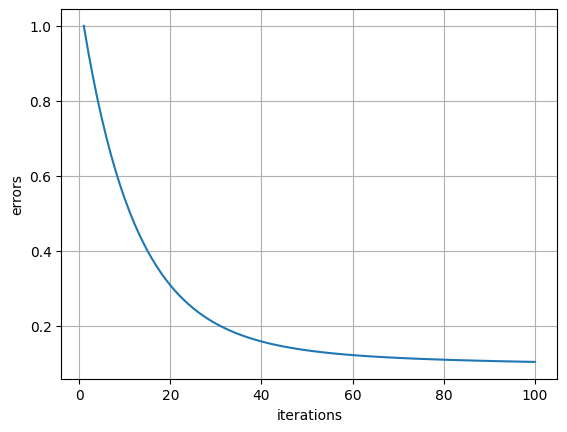

In [ ]:
plt.grid()
plt.xlabel('iterations')
plt.ylabel('errors')
sns.lineplot(x=np.arange(1,101),y=error_list)

In [ ]:
Y_hat=np.matmul(X,W.T)# we can also use (X,W) too both same
Y_hat.shape

(19820,)

In [ ]:
from sklearn import metrics
metrics.r2_score(Y,Y_hat)

0.8957584320233665

# Linear Regression with multiple features (Vectorized)

In [ ]:
print(W.T.shape)
W.shape

(18,)


(18,)

In [ ]:
def hypothesis(X,W):
  return np.matmul(X,W)

In [ ]:
def der_F(X,Y,W):
  Y_hat=hypothesis(X,W)
  grad=np.matmul(X.T,(Y_hat-Y))
  return grad/X.shape[0]

In [ ]:
def error(X,Y,W):
  error=0
  Y_hat=hypothesis(X,W)
  error=np.sum((Y_hat-Y)**2)
  return error/X.shape[0]

In [ ]:
def GradientDescent(X,Y,W,learning_rate,max_steps):
  error_list=[]
  for i in range(max_steps):
    grad=der_F(X,Y,W)
    e=error(X,Y,W)
    print(e)
    error_list.append(e)
    W=W-learning_rate*grad
  return W,error_list

In [ ]:
W=np.zeros(X.shape[1])
W,error_list=GradientDescent(X,Y,W,0.1,300)

1.0
0.43205234246098534
0.2395568427216405
0.16826201153264012
0.13851152901541966
0.12425997141460075
0.11641760987071442
0.11152159427359142
0.10811381583547902
0.10551867649834624
0.10339772550071868
0.10157131868043477
0.09993993792228191
0.0984464721007143
0.09705699393474354
0.09575055559218462
0.09451362764437463
0.09333701391416029
0.092214115596848
0.09113994111785295
0.09011053244342168
0.08912262613037042
0.0881734480382067
0.0872605851047041
0.08638190227250851
0.085535486424248
0.08471960690178171
0.08393268653578866
0.08317327958186196
0.08244005437485784
0.08173177933476736
0.0810473114420023
0.08038558659190666
0.07974561141872762
0.0791264562942162
0.07852724928175467
0.07794717087859758
0.0773854494153424
0.07684135700840697
0.0763142059813061
0.07580334568590488
0.07530815966688222
0.07482806312222832
0.07436250062032057
0.07391094404039829
0.0734728907083946
0.07304786170431776
0.07263540032088106
0.07223507065599814
0.07184645632419846
0.07146915927406265
0.0711027

<Axes: xlabel='iterations', ylabel='errors'>

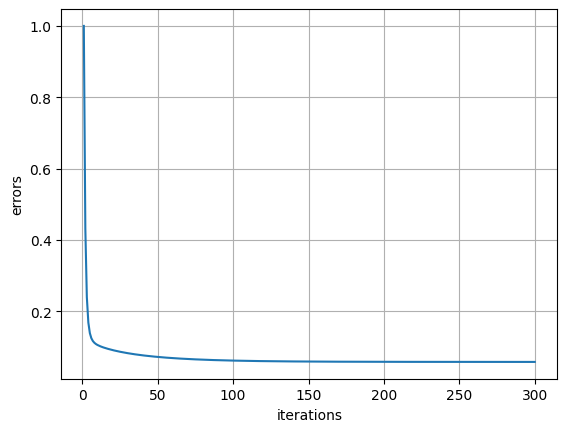

In [ ]:
plt.grid()
plt.xlabel('iterations')
plt.ylabel('errors')
sns.lineplot(x=np.arange(1,301),y=error_list)

In [ ]:
Y_pred=np.matmul(X,W)
metrics.r2_score(Y,Y_pred)

0.9421464375903719

#Verifying using sklearn

In [ ]:
# now we will use complete dataset for model building
Y=df['selling_price'].values
X=df.drop('selling_price',axis=1).values

In [ ]:
X

array([[-8.01316544e-01,  1.19582817e+00,  4.57451688e-02, ...,
         4.95818203e-01,  4.44503185e-01, -4.24728453e-01],
       [ 4.50030281e-01, -7.37872078e-01, -1.40401980e-01, ...,
         4.95818203e-01,  4.44503185e-01, -4.24728453e-01],
       [-1.42698996e+00,  3.56080197e-02, -5.82501459e-01, ...,
         4.95818203e-01,  4.44503185e-01, -4.24728453e-01],
       ...,
       [ 1.37193575e-01,  1.70967037e-01,  3.80810037e-01, ...,
         4.95818203e-01,  4.44503185e-01, -4.24728453e-01],
       [ 4.50030281e-01,  7.23559971e+01, -8.15185395e-01, ...,
         4.95818203e-01, -2.24970266e+00,  2.35444551e+00],
       [ 1.38854040e+00, -8.73231095e-01, -3.49817523e-01, ...,
        -2.01686827e+00,  4.44503185e-01, -4.24728453e-01]])

In [ ]:
Y=Y.reshape(-1,1)
model.fit(X,Y)

LinearRegression()

In [ ]:
model.intercept_

array([8.53958717e-05])

In [ ]:
model.coef_

array([[ 6.33860292e+10, -1.82189941e-02, -4.86839961e-02,
         3.13816980e-02,  2.73645062e-02,  6.33860292e+10,
         6.07876506e-02,  7.94149781e-01, -1.69531423e-02,
        -3.47590617e-03,  1.40814325e-02,  1.27543583e-02,
         2.83212318e-03, -2.25768595e-02, -1.29345257e-02,
        -2.46365460e-02, -3.26575305e-02]])

In [ ]:
model.score(X,Y)

0.9421890705278853